## **Aim:** Predict the optimum number of clusters and represent it visually.

<br>

> #### **By:** Siddharth Kulkarni
> #### **Technique used:** UnSupervised ML: K-Means
> #### **Language used:** Python

## Loading Libraries & Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("../input/iris-dataset/Iris.csv")
print("\nIris Dataset")
data.head()


Iris Dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
print("\nInfo of Dataset\n")
data.info()


Info of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
print("\nData Stats")
data.describe()


Data Stats


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Preprocessing

In [4]:
# Checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

> ##### **There are no Missing values in the Dataset**

## Exploratory Data Analysis

### Histograms

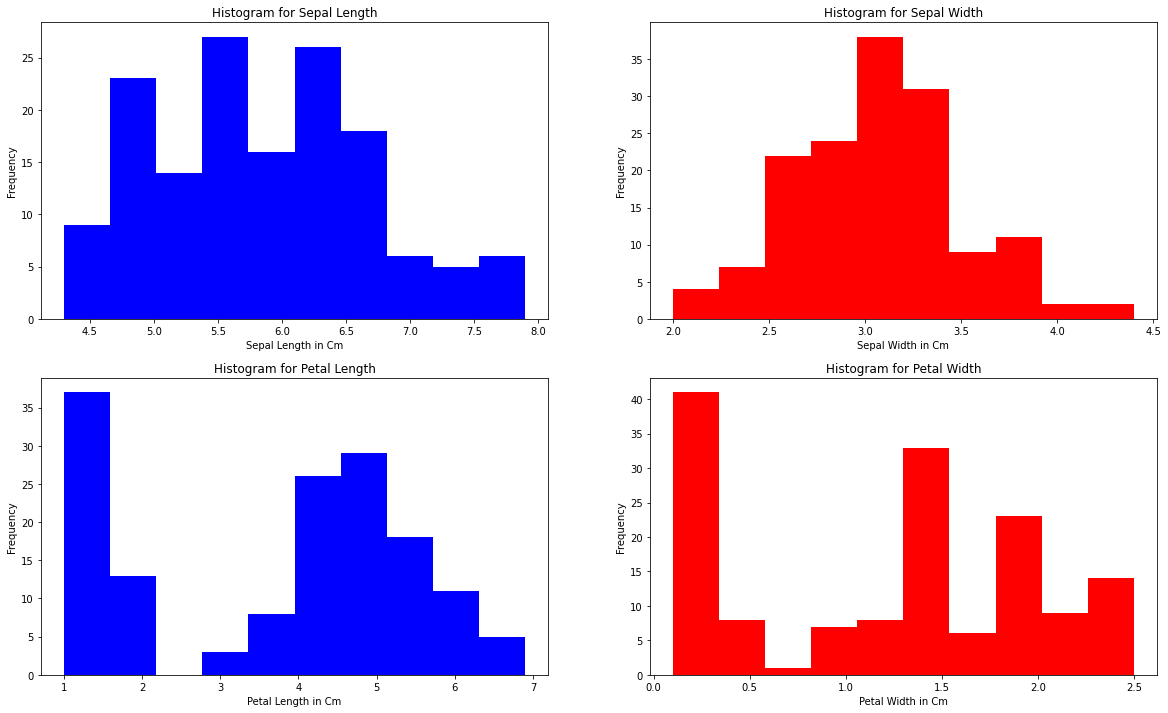

In [5]:
plt.figure(figsize=(20, 12))

plt.subplot(221) 
plt.hist(data['SepalLengthCm'],color = 'blue')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Sepal Length')

plt.subplot(222) 
plt.hist(data['SepalWidthCm'],color = 'red')
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Sepal Width')

plt.subplot(223) 
plt.hist(data['PetalLengthCm'],color = 'blue')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Petal Length')

plt.subplot(224) 
plt.hist(data['PetalWidthCm'],color = 'red')
plt.xlabel('Petal Width in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Petal Width')

plt.show()

> ##### **We Observe that Sepal Width is Normally Distributed**

### Pair Plot (Bivariate Analysis)

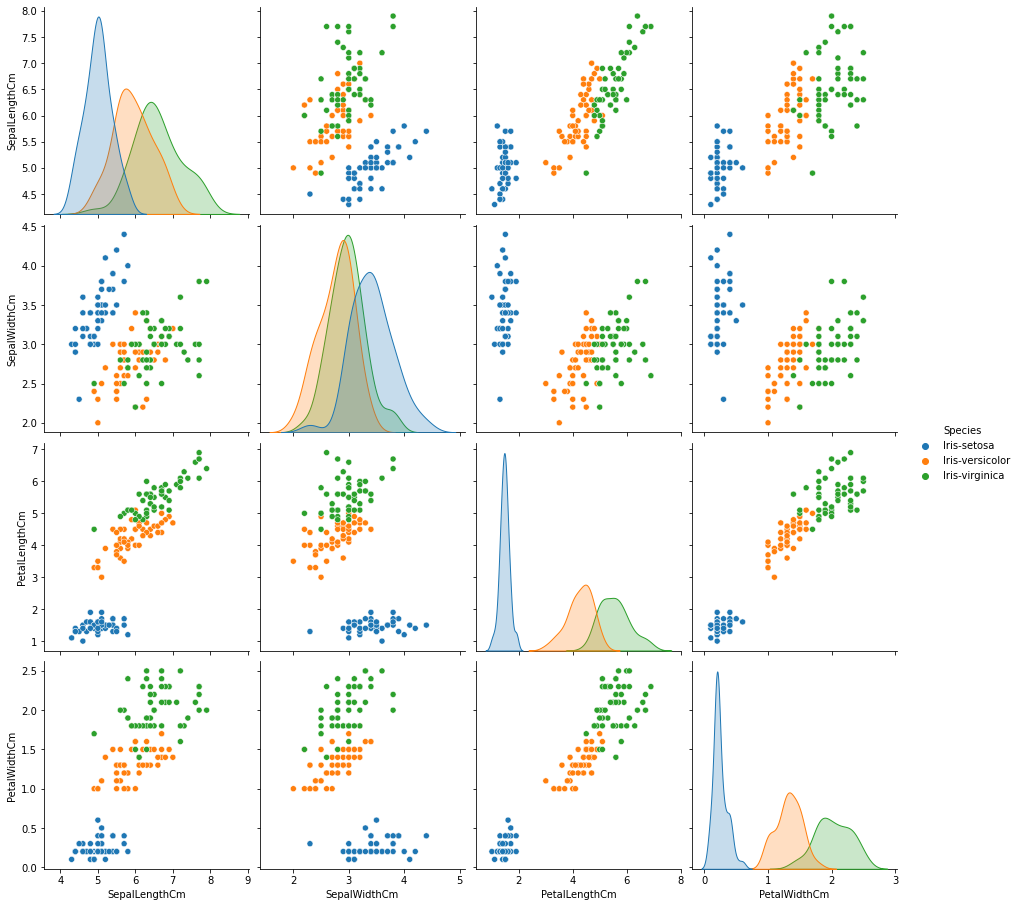

In [6]:
sns.pairplot(data.drop(columns = ['Id']), hue="Species", size=3.2)

In [7]:
print("\nTypes of species:")
data['Species'].unique()


Types of species:


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Scatter Plots 

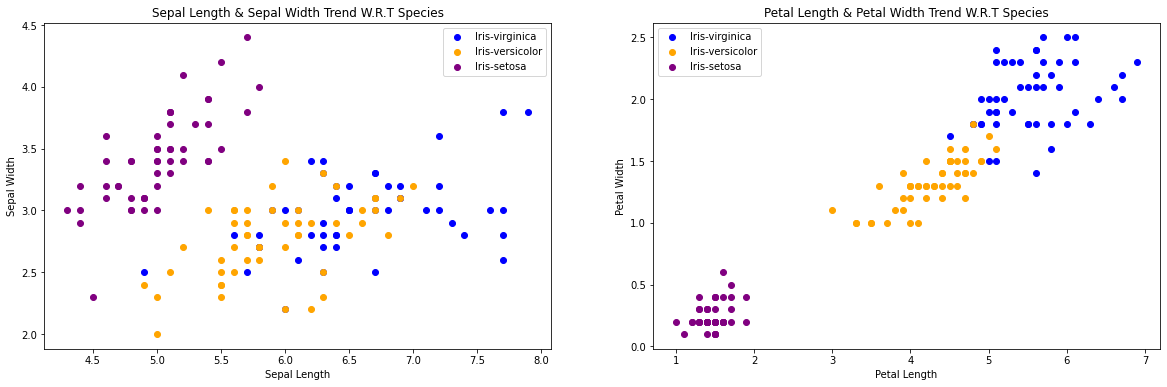

In [8]:
plt.figure(figsize=(20,6))

colors = ['blue','orange','purple']
species = ['Iris-virginica','Iris-versicolor', 'Iris-setosa']

plt.subplot(121) 

for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label = species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width Trend W.R.T Species')
plt.legend()

plt.subplot(122) 

for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label = species[i])
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length & Petal Width Trend W.R.T Species')
plt.legend()

> ##### **Sepal Length & Sepal Width have more overlappings whereas Petal Length & Petal Width have very few overlappings**

### Co-relation Matrix

<AxesSubplot:>

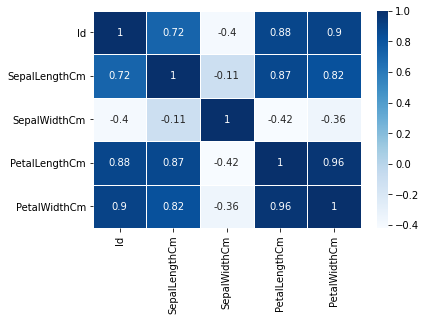

In [9]:
corr = data.corr()
fig,axis = plt.subplots(figsize = (6,4))
sns.heatmap(corr,annot = True, ax = axis,linewidths=.5,cmap="Blues")

> ##### **We Observe that the boxes with dark color are more corelated (Petal Width - Petal length)**

## Label Encoding Categorical Data

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])
print("\nFinal Data")
data.head()


Final Data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Finding the optimal number of clusters for K-Means (Determining the value of K)

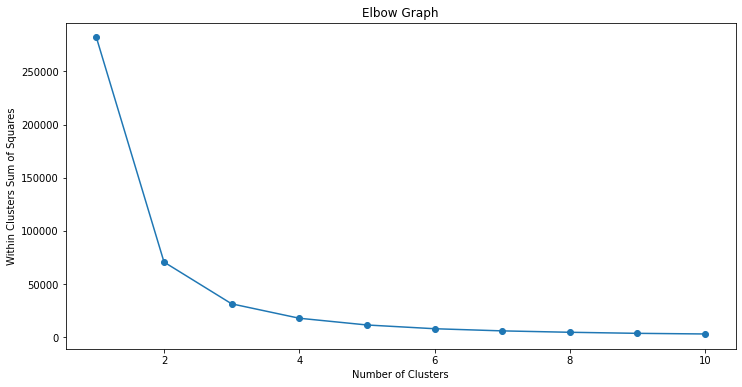

In [11]:
from sklearn.cluster import KMeans

x = data.iloc[:, [0, 1, 2, 3, 4]].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

> **K=1 to K=2 (Steep Slope)**
> 
> **K=2 to K=3 (Gentle Slope)**
> 
> **K=3 (Elbow Point)**

In [12]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

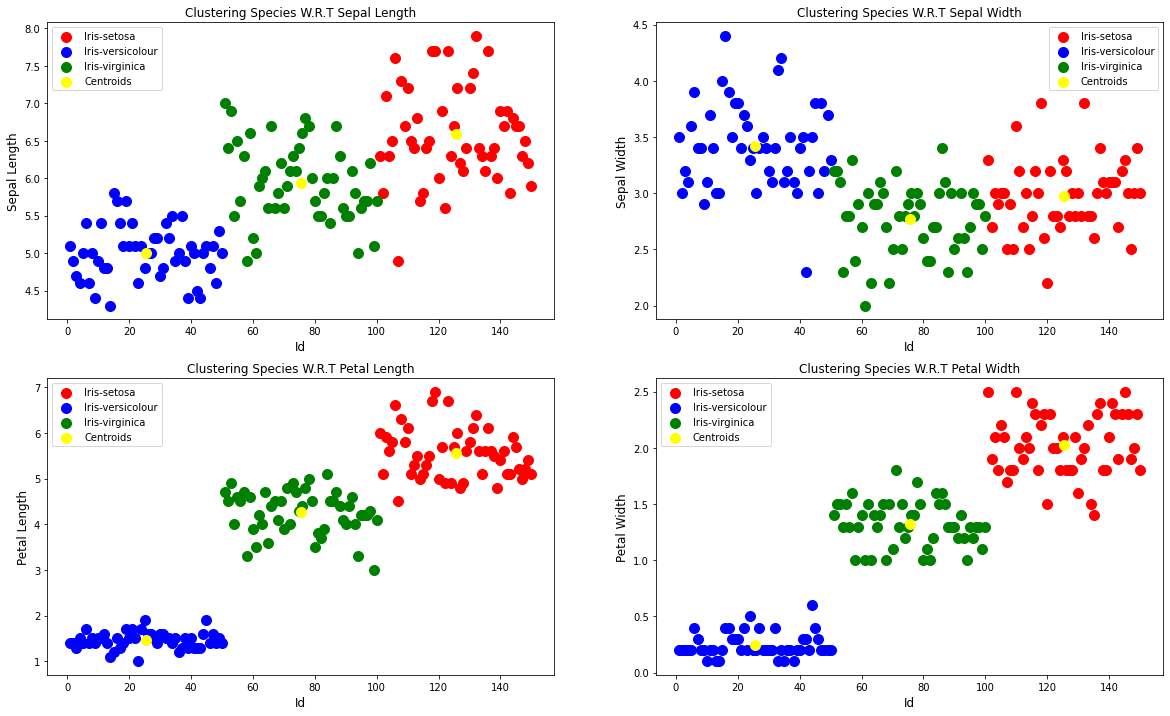

In [13]:
plt.figure(figsize=(20,12))

plt.subplot(221) 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Id',size = 12)
plt.ylabel('Sepal Length',size = 12)
plt.title('Clustering Species W.R.T Sepal Length',size = 12)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.subplot(222) 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Id',size = 12)
plt.ylabel('Sepal Width',size = 12)
plt.title('Clustering Species W.R.T Sepal Width',size = 12)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.subplot(223) 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Id',size = 12)
plt.ylabel('Petal Length',size = 12)
plt.title('Clustering Species W.R.T Petal Length',size = 12)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.subplot(224) 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel('Id',size = 12)
plt.ylabel('Petal Width',size = 12)
plt.title('Clustering Species W.R.T Petal Width',size = 12)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,4], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

> ##### **We Observe that the clusters are perfectly seperated when the k values is 3**

## Feature Selection

In [14]:
# Dropping id
data = data.drop(columns = ['Id'])

## KNN Model

In [15]:
from sklearn.model_selection import train_test_split

x = data.drop(columns = ['Species'])
y = data['Species']
X_train , X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,Y_train)

print("\nAccuracy: ",knn_model.score(X_test,Y_test)*100)


Accuracy:  97.77777777777777


## Conclusion
> #### Used kmeans and successfully predicted the number of clusters required for clustering & Accuracy of K-means: 97.77